In [1]:
import time
import numpy as np
import pvaccess as pva
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, draw, show, ion
ion()
%matplotlib inline

In [2]:
class pvaMonitor:
    def __init__(self, fig=None, ax=None):
        self.x = 0
        self.y = 0
        self.uid = 0
        self.fig = fig
        self.ax = ax
        self.img = None
        self.data = None

    def monitor(self, pv):
        try:
            print('Got image uid: %d' % pv['uniqueId'])
            self.uid = pv['uniqueId']
            self.x, self.y = pv['dimension'][0]['size'], pv['dimension'][1]['size']
            self.data = pv['value'][0]['ubyteValue'].reshape((self.x, self.y))
            # self.updateData()
        except Exception as e:
            print('In callback function with error %s'%e)

    def updateData(self):
        # self.img = self.ax.imshow(self.data, 'gray') if self.img is None else self.img
        self.img.set_data(self.data)

In [4]:
def main(pvaChannel, pva_monitor):
    c = pva.Channel(pvaChannel)
    c.subscribe('monitor', pva_monitor.monitor)
    # c.startMonitor('')
    return c
    # time.sleep(100)

In [5]:
pvaChannel = '13SIM1:Pva1:Image'
m = pvaMonitor()

if __name__ == '__main__':
    c = main(pvaChannel, m)
    c.startMonitor('')
    while 1:
        pass

Got image uid: 0
In callback function with error list index out of range
Got image uid: 1


KeyboardInterrupt: 

Waiting on pva data
Got image uid: 2


KeyboardInterrupt: 

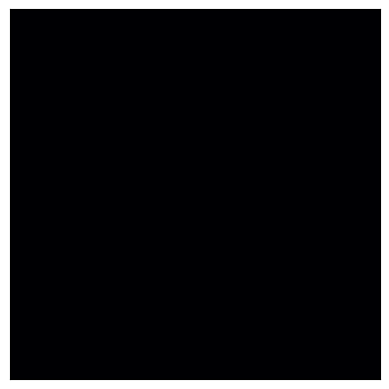

In [9]:
fig, ax = plt.subplots()
ax.set_xticks([])
ax.set_yticks([])

pvaChannel = '13SIM1:Pva1:Image'
m = pvaMonitor(fig, ax)
img = ax.imshow(np.zeros((1024,1024)) if m.data is None else m.data, 'inferno')
# show()
m.img = img
if __name__ == '__main__':
    c = main(pvaChannel, m)
    c.startMonitor('')
    cts = 0
    while 1:
        try:
            if cts < c.getMonitorCounters()['nReceived']:
                print('in here')
                plt.clf()
                img = ax.imgshow(m.data, 'inferno')
                fig.canvas.draw()
                fig.canvas.flush_events()
                cts = c.getMonitorCounters()['nReceived']
        except:
            print('Waiting on pva data')
        time.sleep(3)
    # img = ax.imshow(np.zeros((1024,1024)) if m.data is None else m.data, 'inferno')
    # while 1:
    #     img.set_data(np.zeros((1024,1024)) if m.data is None else m.data)
    #     # img = ax.imshow(np.zeros((1024,1024)) if m.data is None else m.data, 'inferno')
    #     plt.show()
    #     time.sleep(1)

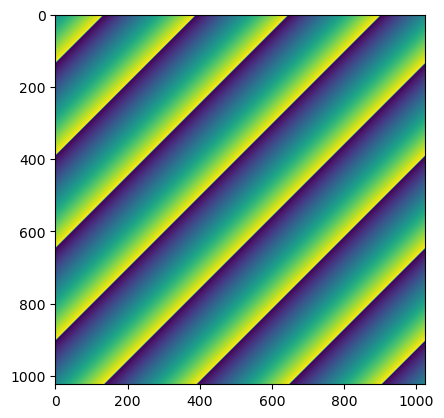

In [9]:
plt.imshow(m.data)


In [12]:
d['value']

({'ubyteValue': array([217, 218, 219, ..., 213, 214, 215], dtype=uint8)},
 {'ubyteValue': [pvaccess.pvaccess.ScalarType.UBYTE]})

In [32]:
c.getMonitorCounters()

{'nReceived': 20, 'nOverruns': 0}

In [33]:
d = c.getMonitorMaxQueueLength()

In [37]:
print(dir(c.qMonitor))

['__call__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__func__', '__ge__', '__get__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__self__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']
